In [1]:
import pandas as pd
import numpy as np

In [2]:
from acquire import get_titanic_data
from prepare import prep_titanic
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [3]:
df = get_titanic_data()
train, validate, test  = prep_titanic(df)

In [4]:
train.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,455,1,3,male,0,0,7.8958,Cherbourg,1,1,0,0
380,380,380,1,1,female,0,0,227.5250,Cherbourg,1,0,0,0
492,492,492,0,1,male,0,0,30.5000,Southampton,1,1,0,1
55,55,55,1,1,male,0,0,35.5000,Southampton,1,1,0,1
243,243,243,0,3,male,0,0,7.1250,Southampton,1,1,0,1


In [5]:
drops = ['sex','pclass','embark_town','passenger_id', 'Unnamed: 0']

In [6]:
[dataset.drop(columns=drops, inplace=True) for dataset in [train, validate, test]]

[None, None, None]

In [7]:
train.columns

Index(['survived', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [8]:
train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [70]:
x_train = train.drop(columns = 'survived')
y_train = train.survived
x_validate = validate.drop(columns = 'survived')
y_validate = validate.survived
x_test = test.drop(columns = 'survived')
y_test = test.survived

In [10]:
x_train

,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,0,0,7.8958,1,1,0,0
380,0,0,227.5250,1,0,0,0
492,0,0,30.5000,1,1,0,1
55,0,0,35.5000,1,1,0,1
243,0,0,7.1250,1,1,0,1
...,...,...,...,...,...,...,...
695,0,0,13.5000,1,1,0,1
128,1,1,22.3583,0,0,0,0
636,0,0,7.9250,1,1,0,1
222,0,0,8.0500,1,1,0,1


In [11]:
baseline = (y_train == 0).mean()

In [12]:
print('our baseline accuracy for nonsurvival is:', baseline)

our baseline accuracy for nonsurvival is: 0.6161048689138576


In [13]:
clf = DecisionTreeClassifier()

In [14]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
clf.score(x_train,y_train)

0.9456928838951311

In [16]:
clf.predict(x_train)

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [17]:
y_preds = pd.DataFrame({
 'y_act': y_train,
'baseline': 0,
'model_1': clf.predict(x_train)})

In [18]:
y_preds

,y_act,baseline,model_1
455,1,0,0
380,1,0,1
492,0,0,0
55,1,0,1
243,0,0,0
...,...,...,...
695,0,0,0
128,1,0,1
636,0,0,0
222,0,0,0


In [19]:
acc = clf.score(x_train, y_train)
accuracy_score(y_preds.y_act, y_preds.model_1)

0.9456928838951311

In [20]:
acc

0.9456928838951311

In [21]:
pd.DataFrame(classification_report(y_preds.y_act, y_preds.model_1, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.923729,0.988889,0.945693,0.956309,0.948743
recall,0.993921,0.868293,0.945693,0.931107,0.945693
f1-score,0.957540,0.924675,0.945693,0.941108,0.944924
support,329.000000,205.000000,0.945693,534.000000,534.000000


In [22]:
conf = confusion_matrix(y_preds.y_act, y_preds.model_1)

In [23]:
conf

array([[327,   2],
       [ 27, 178]])

In [24]:
rubric_df = pd.DataFrame({
    'pred_death': ['True Negative', 'False Negative'],
    'pred_survive':['False Positive','True Positive']
    }, index=['actual_death', 'actual_survive'])

In [25]:
rubric_df

,pred_death,pred_survive
actual_death,True Negative,False Positive
actual_survive,False Negative,True Positive


In [26]:
rubric_df + ': ' + conf.astype(str)

,pred_death,pred_survive
actual_death,True Negative: 327,False Positive: 2
actual_survive,False Negative: 27,True Positive: 178


In [27]:
TN = conf[0,0]
FP = conf[0,1]
FN = conf[1,0]
TP = conf[1,1]
TN, FP, FN, TP

(327, 2, 27, 178)

In [28]:
clf2 = DecisionTreeClassifier(max_depth=4)

In [29]:
clf2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [30]:
y_preds['model2'] = clf2.predict(x_train)

In [31]:
clf2.score(x_train, y_train)

0.8164794007490637

In [32]:
#################################################################################################################

In [33]:
#                                  Decision Forest


In [34]:
x_train.head()

,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,0,0,7.8958,1,1,0,0
380,0,0,227.5250,1,0,0,0
492,0,0,30.5000,1,1,0,1
55,0,0,35.5000,1,1,0,1
243,0,0,7.1250,1,1,0,1


In [35]:
rf = RandomForestClassifier(min_samples_leaf = 1,max_depth = 10, random_state = 123)

In [36]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [38]:
y_pred = rf.predict(x_train)

In [41]:
y_pred_proba = rf.predict_proba(x_train)

In [42]:
y_pred_proba

array([[0.7669554 , 0.2330446 ],
       [0.        , 1.        ],
       [0.53005492, 0.46994508],
       ...,
       [0.86041342, 0.13958658],
       [0.94182956, 0.05817044],
       [0.00142857, 0.99857143]])

In [44]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(x_train, y_train)))

Accuracy of random forest classifier on training set: 0.94


In [45]:
conf = confusion_matrix(y_train,y_pred)
conf

array([[323,   6],
       [ 26, 179]])

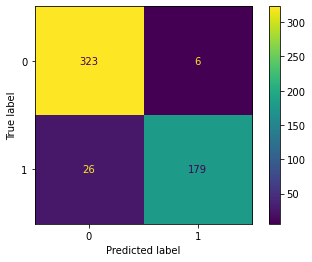

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=rf2.classes_)

disp.plot()
plt.show()


In [48]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       329
           1       0.97      0.87      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.93      0.94       534
weighted avg       0.94      0.94      0.94       534



In [49]:
rf2 = RandomForestClassifier(min_samples_leaf = 4,max_depth = 8, random_state = 123)

In [50]:
rf2.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=4, random_state=123)

In [61]:
y_pred2 = rf2.predict(x_train)

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [62]:
y_pred_proba2 = rf.predict_proba(x_train)

In [63]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf2.score(x_train, y_train)))

Accuracy of random forest classifier on training set: 0.85


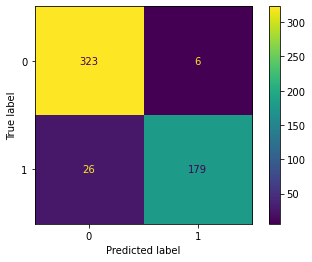

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=rf2.classes_)

disp.plot()
plt.show()



In [91]:
TP = 179
TN = 26
FP = 6
FN = 323

In [65]:
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       329
           1       0.84      0.75      0.79       205

    accuracy                           0.85       534
   macro avg       0.85      0.83      0.84       534
weighted avg       0.85      0.85      0.85       534



In [73]:
rf3 = RandomForestClassifier(min_samples_leaf = 6,max_depth = 6, random_state = 123)

In [74]:
rf3.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=6, random_state=123)

In [75]:
y_pred3 = rf3.predict(x_train)

In [77]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf3.score(x_train, y_train)))

Accuracy of random forest classifier on training set: 0.84


In [78]:
print(classification_report(y_train, y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       329
           1       0.86      0.70      0.77       205

    accuracy                           0.84       534
   macro avg       0.84      0.81      0.82       534
weighted avg       0.84      0.84      0.84       534



In [ ]:
##############################TRAIN##############################################################

In [80]:
#first forest (min =1 max =10)
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(x_train, y_train)))

Accuracy of random forest classifier on validate set: 0.94


In [81]:
#second forest (min =4 max = 8)
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf2.score(x_train, y_train)))

Accuracy of random forest classifier on validate set: 0.85


In [82]:
#second forest (min =6 max = 6)
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf3.score(x_train, y_train)))

Accuracy of random forest classifier on validate set: 0.84


In [ ]:
##############################VALIDATE#################################################

In [71]:
#first forest (min =1 max =10)
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(x_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.76


In [72]:
#second forest (min =4 max = 8)
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf2.score(x_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.77


In [79]:
#THird forest (min =6 max = 6)
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf3.score(x_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.76


In [ ]:
###########################CLASSIFICATION REPORTS#####################################################

In [86]:
#first forest (min =1 max =10)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       329
           1       0.97      0.87      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.93      0.94       534
weighted avg       0.94      0.94      0.94       534



In [87]:
#second forest (min =4 max = 8)
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       329
           1       0.84      0.75      0.79       205

    accuracy                           0.85       534
   macro avg       0.85      0.83      0.84       534
weighted avg       0.85      0.85      0.85       534



In [89]:
#Third Forest (min = 6, max = 6)
print(classification_report(y_train,y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       329
           1       0.86      0.70      0.77       205

    accuracy                           0.84       534
   macro avg       0.84      0.81      0.82       534
weighted avg       0.84      0.84      0.84       534



In [90]:
#Second forest is the most consistant